<a href="https://colab.research.google.com/github/DanielCM2/P-code/blob/main/Task_2_Census_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

# import dataset
df = fetch_ucirepo(id=2)

# access data
X = df.data.features
y = df.data.targets
# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(df.metadata.uci_id)
print(df.metadata.num_instances)
print(df.metadata.additional_info.summary)

# access variable info in tabular format
print(df.variables)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [ ]:
print(X.shape)
print(y.shape)

(48842, 14)
(48842, 1)


In [ ]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0
IsSenior,48842.0,0.083023,0.275920,0.0,0.0,0.0,0.0,1.0
IsMarried,48842.0,1.173150,0.896187,0.0,0.0,2.0,2.0,2.0


In [ ]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [ ]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

17

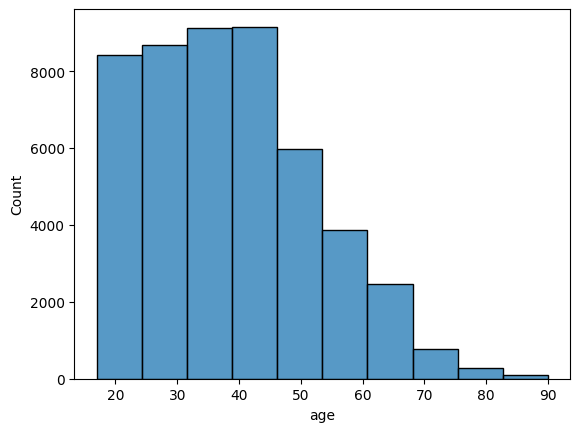

In [ ]:
sns.histplot(X['age'], bins=10)

X['age'].min()

<Axes: xlabel='fnlwgt', ylabel='Count'>

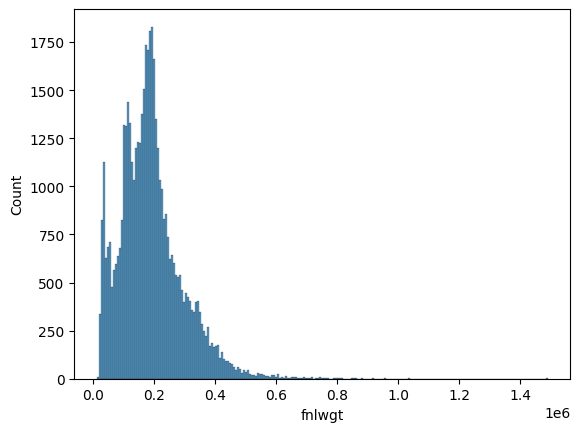

In [ ]:
sns.histplot(X['fnlwgt'])

<Axes: xlabel='education', ylabel='Count'>

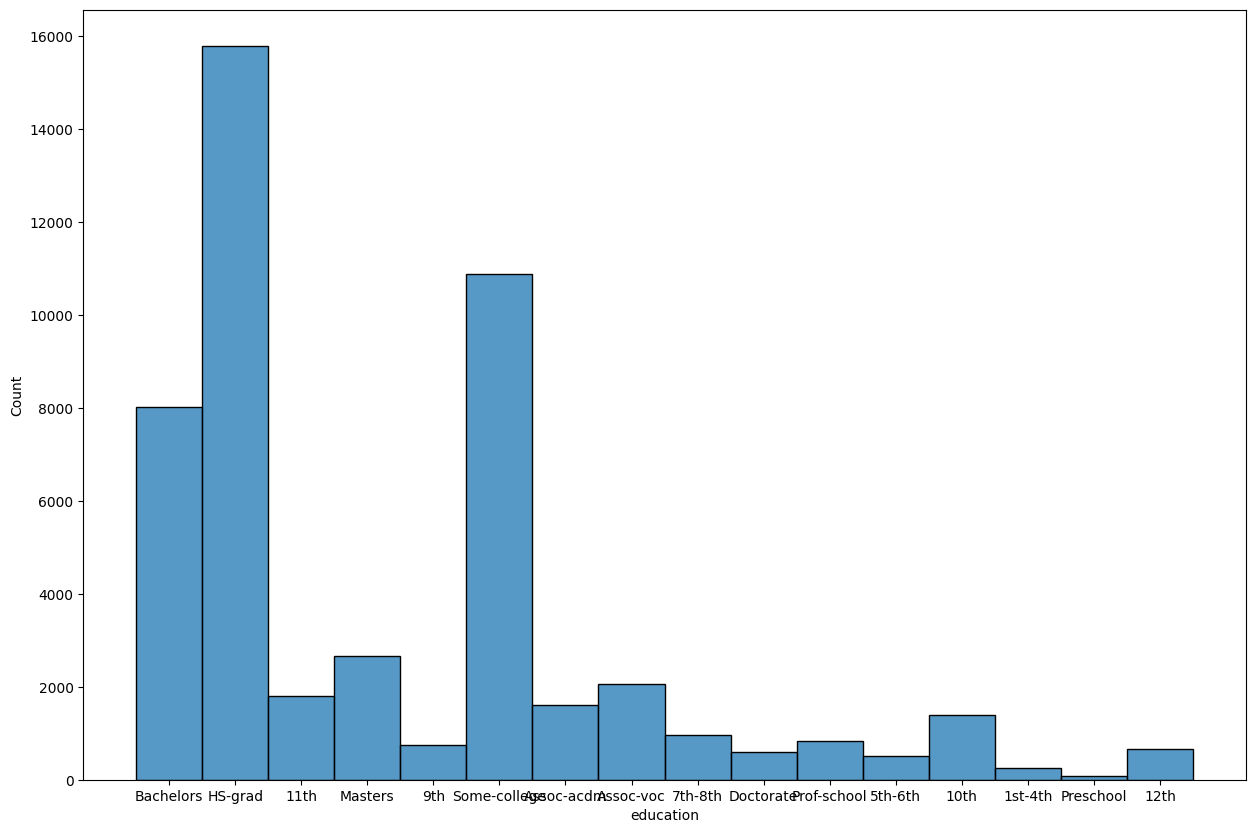

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(X['education'])

In [ ]:
X['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [ ]:
mapping_edu = {
        'Preschool':'Elementary',
        '1st-4th':'Elementary',
        '5th-6th':'Elementary',
        '7th-8th':'Middle',
        '9th':'Middle',
        '10th':'High school',
        '11th':'High school',
        '12th':'High school',
        'HS-grad':'High school',
        'Some-college':'College',
        'Assoc-voc':'Associate',
        'Assoc-acdm':'Associate',
        'Bachelors':'Bachelors',
        'Masters':'Masters',
        'Prof-school':'PhD/Doctorate',
        'Doctorate':'PhD/Doctorate'
    }

#X['education'].replace(mapping_edu).value_counts()

<Axes: xlabel='marital-status', ylabel='Count'>

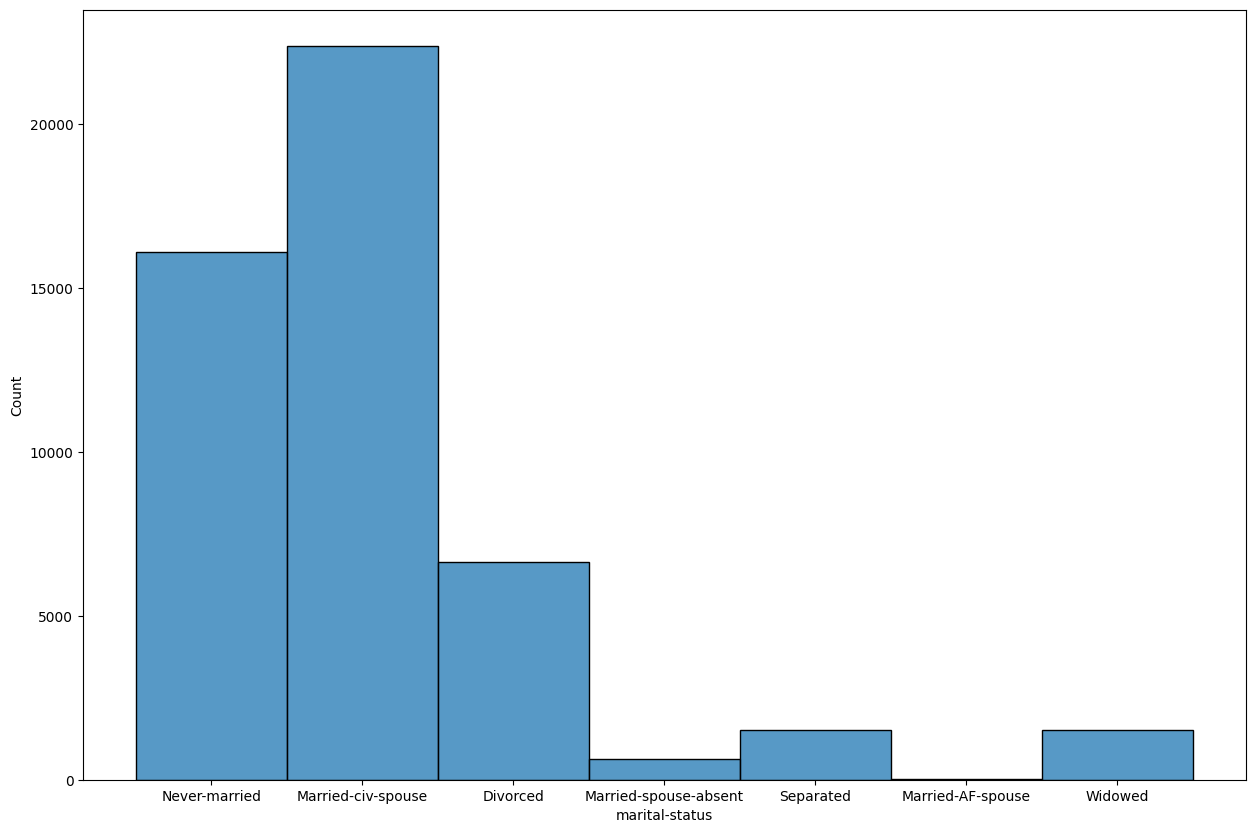

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(X['marital-status'])

In [ ]:
mapping_marital = {
        'Married-civ-spouse':'Married',
        'Married-spouse-absent':'Married',
        'Married-AF-spouse':'Married',
        'Divorced':'Others',
        'Widowed':'Others',
        'Never-married':'Single',
        'Separated':'Others',
    }

#X['marital-status'].replace(mapping_marital).value_counts()

<Axes: xlabel='occupation', ylabel='Count'>

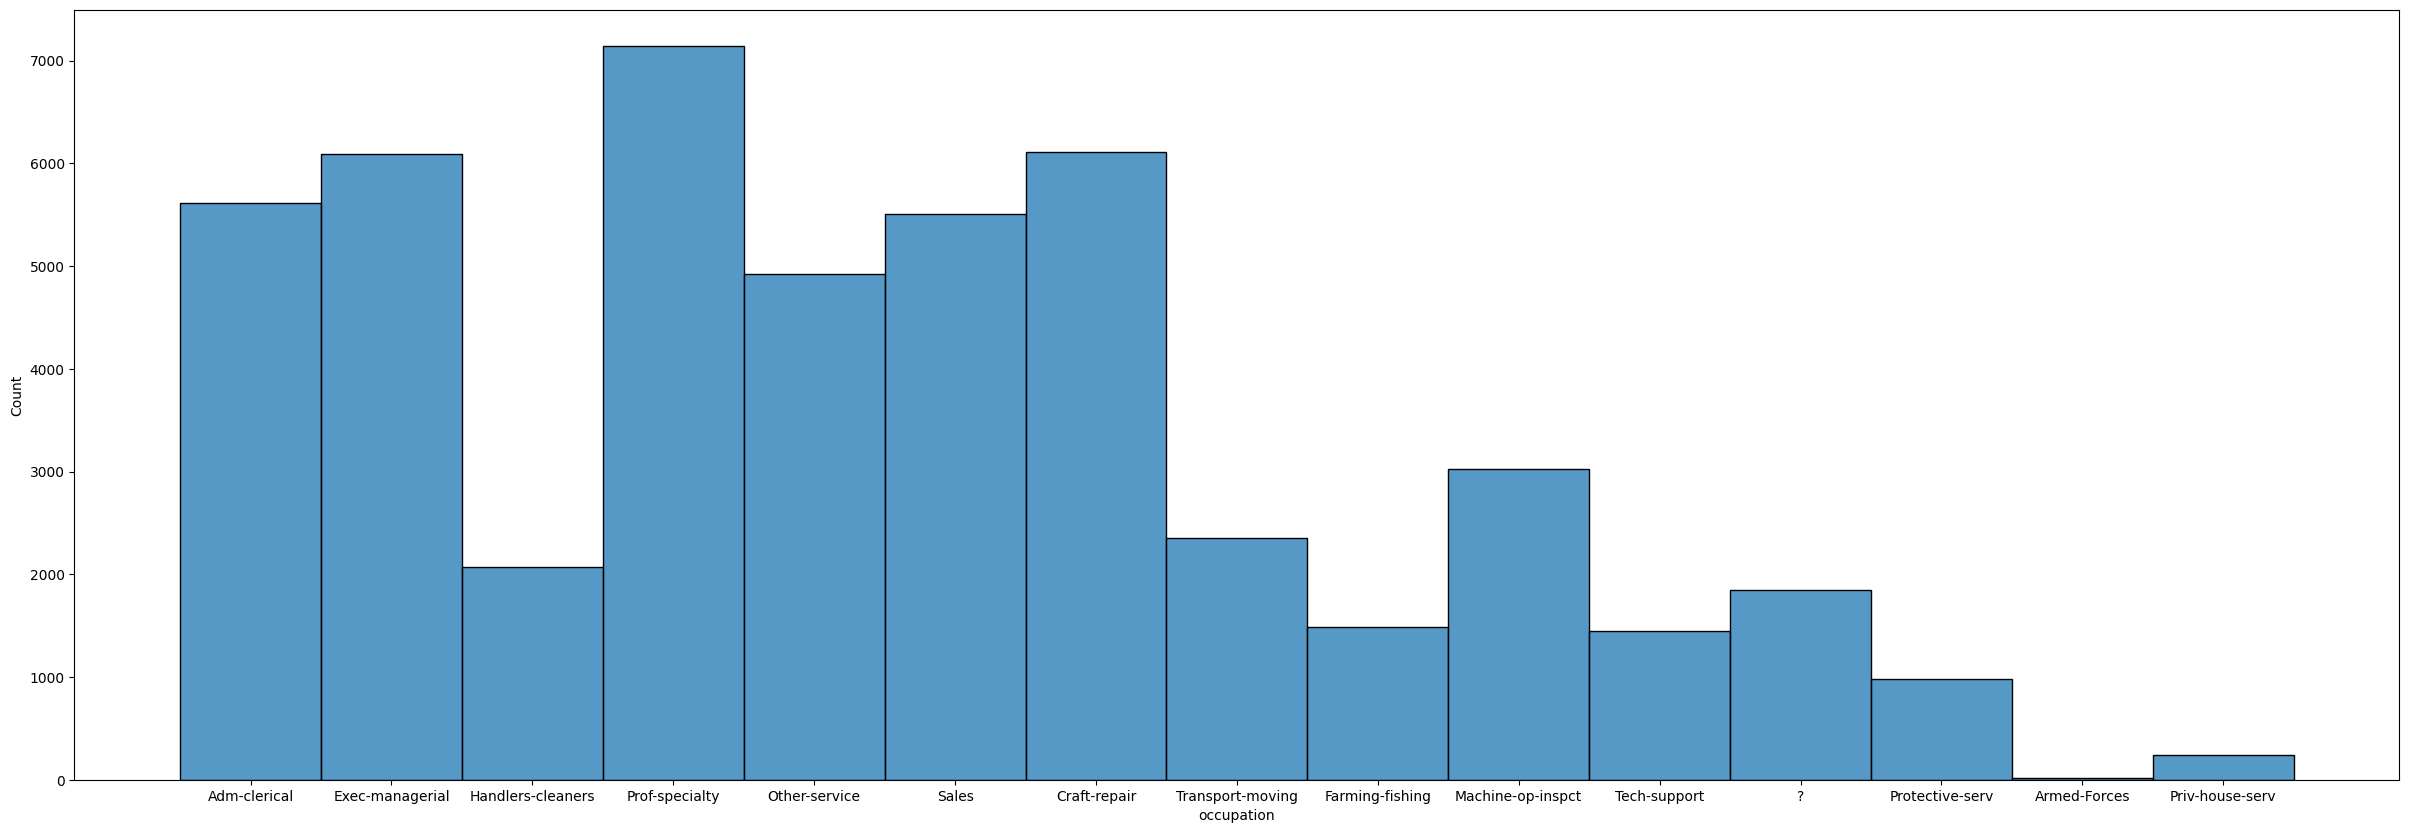

In [ ]:
plt.figure(figsize=(30,10))
sns.histplot(X['occupation'])

In [ ]:
mapping_occupation = {
    'Adm-clerical':'White-Collar',
    'Exec-managerial':'White-Collar',
    'Farming-fishing':'Blue-Collar',
    'Handlers-cleaners':'Blue-Collar',
    'Machine-op-inspct':'Blue-Collar',
    'Priv-house-serv':'Blue-Collar',
    'Prof-specialty':'White-Collar',
    'Protective-serv':'Blue-Collar',
    'Sales':'White-Collar',
    'Craft-repair':'Blue-Collar',
    'Transport-moving':'Blue-Collar',
    'Tech-support':'White-Collar',
    'Armed-Forces':'Military',
    'Other-service':'Others'
}


<Axes: xlabel='relationship', ylabel='Count'>

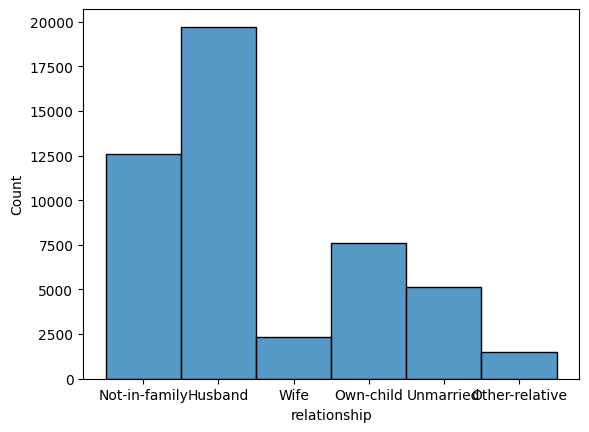

In [ ]:
sns.histplot(X['relationship'])

<Axes: xlabel='race', ylabel='Count'>

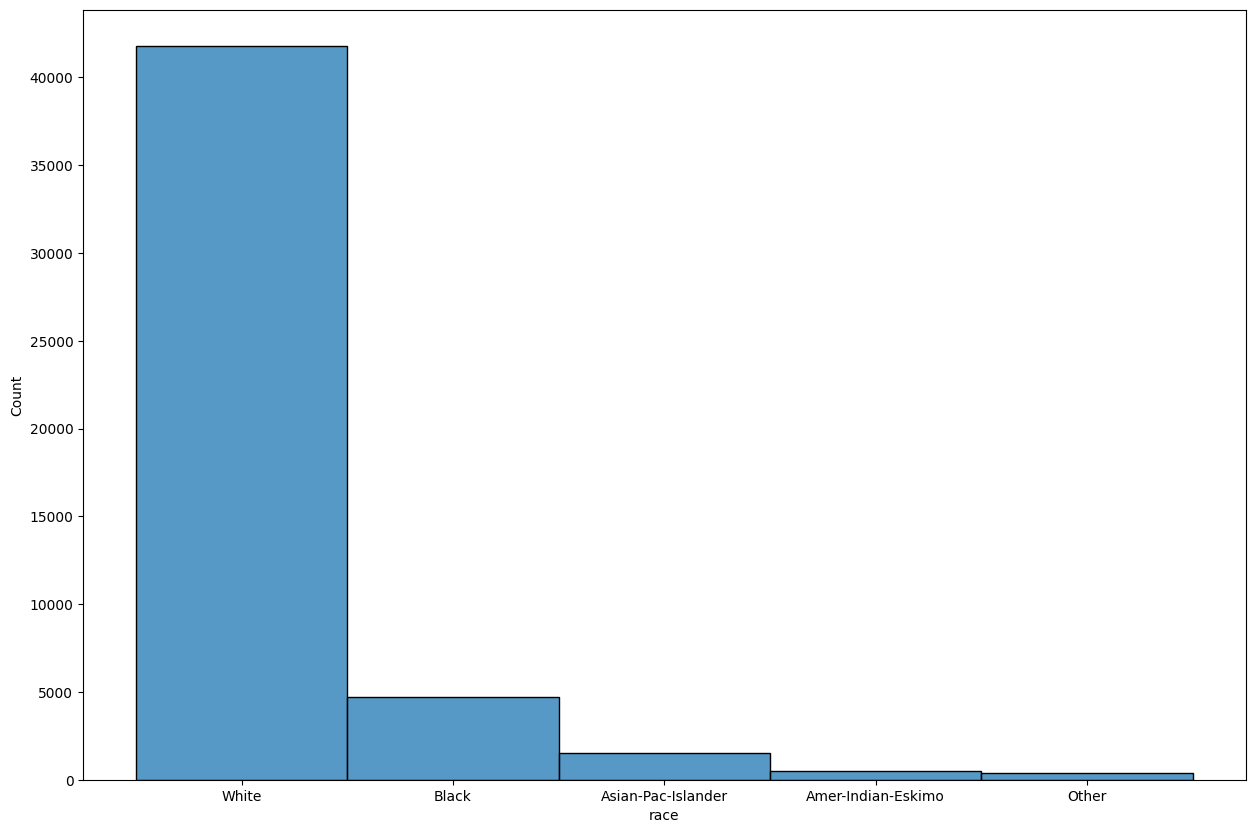

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(X['race'])

<Axes: xlabel='sex', ylabel='Count'>

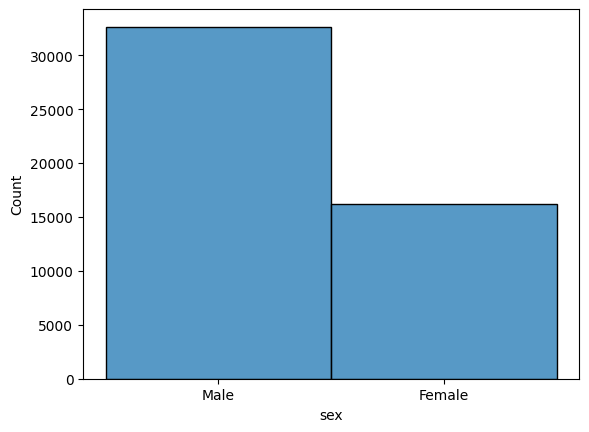

In [ ]:
sns.histplot(X['sex'])

<Axes: xlabel='capital-gain', ylabel='Count'>

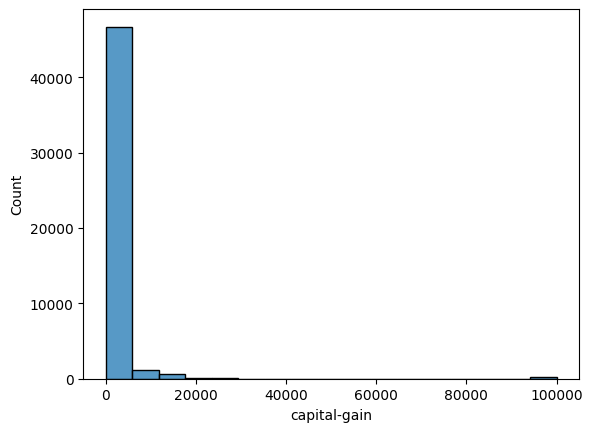

In [ ]:
sns.histplot(X['capital-gain'])

<Axes: xlabel='capital-loss', ylabel='Count'>

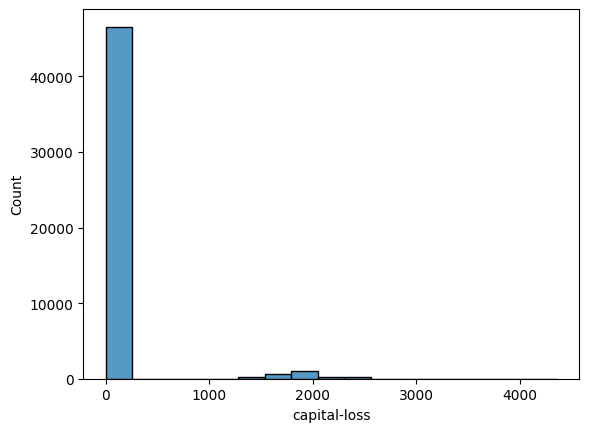

In [ ]:
sns.histplot(X['capital-loss'])

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

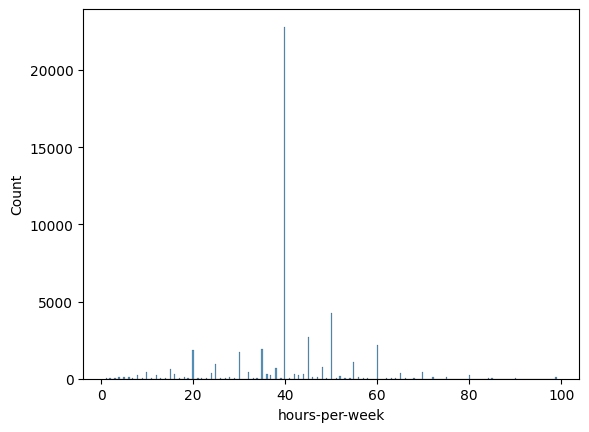

In [ ]:
sns.histplot(X['hours-per-week'])
X['hours-per-week'].describe()

In [ ]:
X['native-country'].value_counts()

native-country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

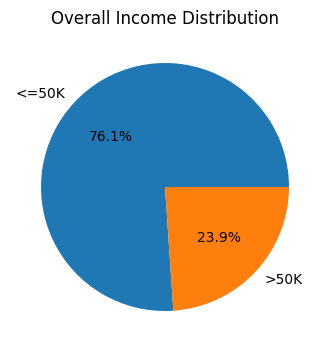

In [ ]:
plt.figure(figsize=(4,6))
plt.pie(y.value_counts(), labels=['<=50K', '>50K'], autopct='%1.1f%%')
plt.title('Overall Income Distribution')
plt.show()

Imputing Null Data

In [ ]:
X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
X['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
X['native-country'].fillna(X['native-country'].mode()[0], inplace=True)

<ipython-input-6-a8e17d143155>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
<ipython-input-6-a8e17d143155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
<ipython-input-6-a8e17d143155>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'].fillna(X['native-country'].mode()[0], inplace=True)


In [ ]:
X['workclass'].replace('?', X['workclass'].mode()[0], inplace=True)
X['occupation'].replace('?', X['occupation'].mode()[0], inplace=True)
X['native-country'].replace('?', X['native-country'].mode()[0], inplace=True)

<ipython-input-7-1cc5e931ad6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].replace('?', X['workclass'].mode()[0], inplace=True)
<ipython-input-7-1cc5e931ad6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'].replace('?', X['occupation'].mode()[0], inplace=True)
<ipython-input-7-1cc5e931ad6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'].replace('?', X['native-country'].mode()[0

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00


In [ ]:
y.replace({'<=50K':0,'<=50K.':0, '>50K':1, '>50K.':1}, inplace=True)

<ipython-input-9-0d0fd077aa85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({'<=50K':0,'<=50K.':0, '>50K':1, '>50K.':1}, inplace=True)


In [ ]:
def new_feats(df):
      df['IsSenior'] = df['age'].apply(lambda x: 1 if x >= 60 else 0)
      df['IsMarried'] = df['marital-status'].apply(lambda x: 0 if x == 'Never-married' else (1 if x in ['Divorced', 'Seperated', 'Widowed'] else 2))
      df['grouped_edu'] = df['education'].map(mapping_edu)
      df['grouped_marital'] = df['marital-status'].map(mapping_marital)
      df['grouped_occupation'] = df['occupation'].map(mapping_occupation)

      return df
new_X = new_feats(X)
new_X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,IsSenior,IsMarried,grouped_edu,grouped_marital,grouped_occupation
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0,Bachelors,Single,White-Collar
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,2,Bachelors,Married,White-Collar
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1,High school,Others,Blue-Collar
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,2,High school,Married,Blue-Collar
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,2,Bachelors,Married,White-Collar


In [ ]:
X_copy = new_X.copy()
y_copy = y.copy()

In [ ]:
s = X.dtypes == 'object'
object_cols = list(s[s].index)
object_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'grouped_edu',
 'grouped_marital',
 'grouped_occupation']

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df, col):
    le = LabelEncoder()
    df[col+'_Encoded'] = le.fit_transform(df[col])
    return df

for col in object_cols:
    X_copy = label_encoder(X_copy, col)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.drop(object_cols, axis=1)
X_test = X_test.drop(object_cols, axis=1)

In [ ]:
X_train.drop('education-num',axis=1)
X_test.drop('education-num',axis=1)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,IsSenior,IsMarried,workclass_Encoded,education_Encoded,marital-status_Encoded,occupation_Encoded,relationship_Encoded,race_Encoded,sex_Encoded,native-country_Encoded,grouped_edu_Encoded,grouped_marital_Encoded,grouped_occupation_Encoded
7762,18,423024,0,0,20,0,0,3,11,4,7,1,4,1,38,4,2,2
23881,17,178953,0,0,20,0,0,3,2,4,11,3,4,0,38,4,2,3
30507,25,348986,0,0,40,0,0,1,11,4,5,2,2,1,38,4,2,0
28911,20,218215,0,0,30,0,0,3,15,4,11,3,4,0,38,2,2,3
19484,47,244025,0,0,56,0,0,3,11,4,6,4,0,1,32,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,56,118614,0,0,36,0,2,5,12,5,11,4,4,0,38,5,1,3
18798,21,205838,0,0,37,0,0,3,11,4,7,3,4,1,38,4,2,2
29519,38,194304,0,0,55,0,1,3,15,0,13,1,2,1,38,2,1,0
550,46,245724,0,0,50,0,1,5,15,0,3,1,4,1,38,2,1,3


In [ ]:
scaled_cols = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

from sklearn.preprocessing import StandardScaler

for c in scaled_cols:
    min_val = X_train[c].min()
    max_val = X_train[c].max()
    X_train[c+'_scaled'] = (X_train[c] - min_val) / (max_val - min_val)
    X_test[c+'_scaled'] = (X_test[c] - min_val) / (max_val - min_val)

X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,IsSenior,IsMarried,workclass_Encoded,education_Encoded,...,sex_Encoded,native-country_Encoded,grouped_edu_Encoded,grouped_marital_Encoded,grouped_occupation_Encoded,age_scaled,fnlwgt_scaled,capital-gain_scaled,capital-loss_scaled,hours-per-week_scaled
37193,32,50753,9,0,0,40,0,2,3,11,...,1,38,4,0,0,0.205479,0.026025,0.0,0.0,0.397959
31093,45,144351,14,0,0,40,0,2,6,12,...,1,38,5,0,3,0.383562,0.089348,0.0,0.0,0.397959
33814,35,252217,8,0,0,40,0,2,1,2,...,1,38,4,0,0,0.246575,0.162323,0.0,0.0,0.397959
14500,64,69525,9,0,0,20,1,1,3,11,...,1,38,4,1,0,0.643836,0.038725,0.0,0.0,0.193878
23399,63,28612,9,0,0,70,1,1,5,11,...,1,38,4,1,3,0.630137,0.011046,0.0,0.0,0.704082


In [ ]:
X_train = X_train.drop(scaled_cols, axis=1)
X_test = X_test.drop(scaled_cols, axis=1)

In [ ]:
X_train = X_train.drop('education-num',axis=1)
X_test = X_test.drop('education-num',axis=1)

In [ ]:
from catboost import CatBoostClassifier
auc_vals=[]

model = CatBoostClassifier(
    eval_metric='AUC',
    learning_rate=0.01,
    iterations=6000)

model.fit(X_train, y_train,verbose=300)

y_pred = model.predict(X_test)

y_pred_prob = model.predict_proba(X_test)[:,1]
auc_val = roc_auc_score(y_test, y_pred)
print("AUC:", auc_val)
auc_vals.append(auc_val)

0:	total: 12.6ms	remaining: 1m 15s
300:	total: 4.73s	remaining: 1m 29s
600:	total: 8.77s	remaining: 1m 18s
900:	total: 12.1s	remaining: 1m 8s
1200:	total: 15.4s	remaining: 1m 1s
1500:	total: 20.7s	remaining: 1m 1s
1800:	total: 24s	remaining: 56s
2100:	total: 27.4s	remaining: 50.8s
2400:	total: 33.3s	remaining: 49.9s
2700:	total: 36.6s	remaining: 44.7s
3000:	total: 39.9s	remaining: 39.9s
3300:	total: 44.9s	remaining: 36.7s
3600:	total: 48.4s	remaining: 32.3s
3900:	total: 51.8s	remaining: 27.9s
4200:	total: 55.1s	remaining: 23.6s
4500:	total: 1m	remaining: 20s
4800:	total: 1m 3s	remaining: 15.8s
5100:	total: 1m 6s	remaining: 11.8s
5400:	total: 1m 12s	remaining: 7.99s
5700:	total: 1m 15s	remaining: 3.95s
5999:	total: 1m 18s	remaining: 0us
AUC: 0.7960988191846835


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

model = XGBClassifier()

model.fit(X_train, y_train,verbose=300)

y_pred2 = model.predict(X_test)

y_pred_prob = model.predict_proba(X_test)[:,1]
auc_val = roc_auc_score(y_test, y_pred2)

print("AUC:", auc_val)

AUC: 0.7995957896834874


# **Model Demo**

In [ ]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
data = {'test':y_test['income'].to_list(), 'pred':y_pred2}

new_df = pd.DataFrame(data)
new_df

,test,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9764,0,0
9765,0,0
9766,0,0
9767,0,0


 **Sampling Data**

In [ ]:
X1 = new_df.loc[new_df['pred']==1].sample(1000)

In [ ]:
X1['expected_rev']=np.where(X1['test']==1,0.7*500,0.2*500)

In [ ]:
X2 = new_df.sample(1000)

In [ ]:
X2['expected_rev']=np.where(X2['test']==1,0.7*500,0.2*500)

In [ ]:
X1['expected_rev'].sum()

296750.0

In [ ]:
X2['expected_rev'].sum()

161000.0

In [ ]:
net_profit = X1['expected_rev'].sum() - 100*X1.shape[0]
net_profit

196750.0

In [ ]:
net_profit2 = X2['expected_rev'].sum() - 100*X2['test'].count()
net_profit2

61000.0

In [ ]:
rev_diff = (net_profit-net_profit2)/net_profit2*100
rev_diff

222.54098360655738

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def metrics(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = metrics(y_test, y_pred)

In [ ]:
metrics(y_test, y_pred)

(0.8736820554816256,
 0.7914716588663546,
 0.6462845010615711,
 0.7115474520804114)

In [ ]:
metrics(y_test, y_pred2)

(0.8732725969904801,
 0.7822132390096008,
 0.6573248407643312,
 0.7143516382095061)